In [1]:
import numpy as np
from sklearn import cluster, datasets
import scipy
from scipy import misc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

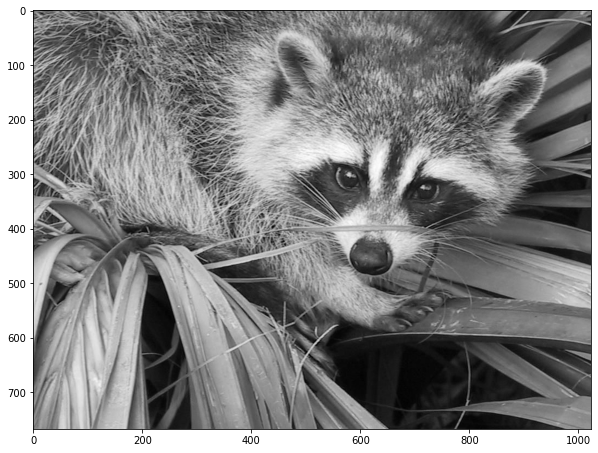

In [2]:
# Load the image from scipy package
original_image = scipy.misc.face(gray=True)
plt.figure(figsize=(10,8))
plt.imshow(original_image,plt.cm.gray)
plt.show()

In [3]:
#Dimension of the original image
rows = original_image.shape[0]
columns = original_image.shape[1]

In [4]:
# Flatten the image
image = original_image.reshape(rows*columns,1)

In [5]:
# Implement KMeans clustering to form 5 clusters
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(image)

KMeans(n_clusters=5)

In [6]:
#Replace each pixel value with its nearby centroid
compressed_image = Kmeans.cluster_centers_[Kmeans.labels_]
#Image ndarrays can be represented either by integers (signed or unsigned) or floats.
compressed_image = np.clip(compressed_image.astype('uint32'), 0, 256)

In [7]:
#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, columns)

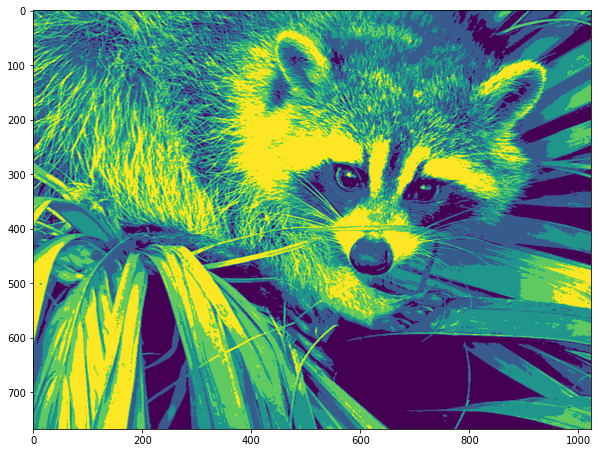

In [8]:
#Save and display output image
plt.figure(figsize=(10,8))
plt.imsave('compressed_image.png', compressed_image)
plt.imshow(compressed_image)
plt.show()